In [64]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme()
sns.set_style("whitegrid")

base_path = f"{os.environ["OneDrive"]}/Data Science Project Idea 31"


### Demographics Analysis


In [65]:
demographics = pd.read_csv(f"{base_path}/demographics.csv")
demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10 non-null     int64  
 1   NativeAmerican   10 non-null     float64
 2   Asian            10 non-null     float64
 3   Black            10 non-null     float64
 4   Hispanic         10 non-null     float64
 5   Multiracial      10 non-null     float64
 6   PacificIslander  10 non-null     float64
 7   unknown          10 non-null     int64  
 8   White            10 non-null     float64
 9   LowIncome        10 non-null     float64
dtypes: float64(8), int64(2)
memory usage: 932.0 bytes


In [66]:
# remove unknown column since it does not contain any data
demographics.drop(columns=["unknown"], inplace=True)
demographics.describe()

,ID,NativeAmerican,Asian,Black,Hispanic,Multiracial,PacificIslander,White,LowIncome
count,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000
mean,5.50000,0.012000,0.018000,0.039000,0.127000,0.154000,0.03500,0.613000,0.731000
std,3.02765,0.007888,0.013166,0.028848,0.028694,0.029889,0.03171,0.117762,0.188706
min,1.00000,0.000000,0.000000,0.010000,0.090000,0.110000,0.00000,0.440000,0.380000
25%,3.25000,0.010000,0.010000,0.022500,0.110000,0.135000,0.00000,0.517500,0.640000
50%,5.50000,0.010000,0.020000,0.035000,0.125000,0.155000,0.05000,0.620000,0.835000
75%,7.75000,0.020000,0.030000,0.047500,0.152500,0.177500,0.05000,0.700000,0.847500
max,10.00000,0.020000,0.030000,0.110000,0.170000,0.190000,0.08000,0.790000,0.910000


- Most represented group: White
- Least represented group: Native American
- Most of the schools children appears to be low income. (Mean and median are 0.73 and 0.83 respectively, There might be an outlier in the column)
- For other columns, the mean and median are roughly the same.

In [67]:
# check for missing values
demographics.isna().sum()

ID                 0
NativeAmerican     0
Asian              0
Black              0
Hispanic           0
Multiracial        0
PacificIslander    0
White              0
LowIncome          0
dtype: int64

In [68]:
# checking whether sum of every nationality == 1
demographics['proportion_sum'] = demographics[
    ['NativeAmerican', 'Asian', 'Black', 'Hispanic', 'Multiracial', 'PacificIslander', 'White']].sum(axis=1)
demographics[demographics['proportion_sum'] != 1]

,ID,NativeAmerican,Asian,Black,Hispanic,Multiracial,PacificIslander,White,LowIncome,proportion_sum
0,1,0.02,0.03,0.04,0.09,0.16,0.00,0.64,0.70,0.98
1,2,0.01,0.01,0.03,0.13,0.15,0.05,0.61,0.84,0.99
2,3,0.00,0.01,0.01,0.09,0.11,0.00,0.79,0.45,1.01
3,4,0.01,0.00,0.01,0.12,0.13,0.00,0.72,0.62,0.99
4,5,0.02,0.03,0.11,0.16,0.18,0.07,0.44,0.83,1.01
5,6,0.00,0.00,0.02,0.11,0.11,0.00,0.75,0.38,0.99
9,10,0.02,0.03,0.05,0.16,0.19,0.08,0.48,0.89,1.01


In 7 out of 10 schools, the sum of nationalities does not equal to 1. (It's pretty close though. Might be a rounding error)

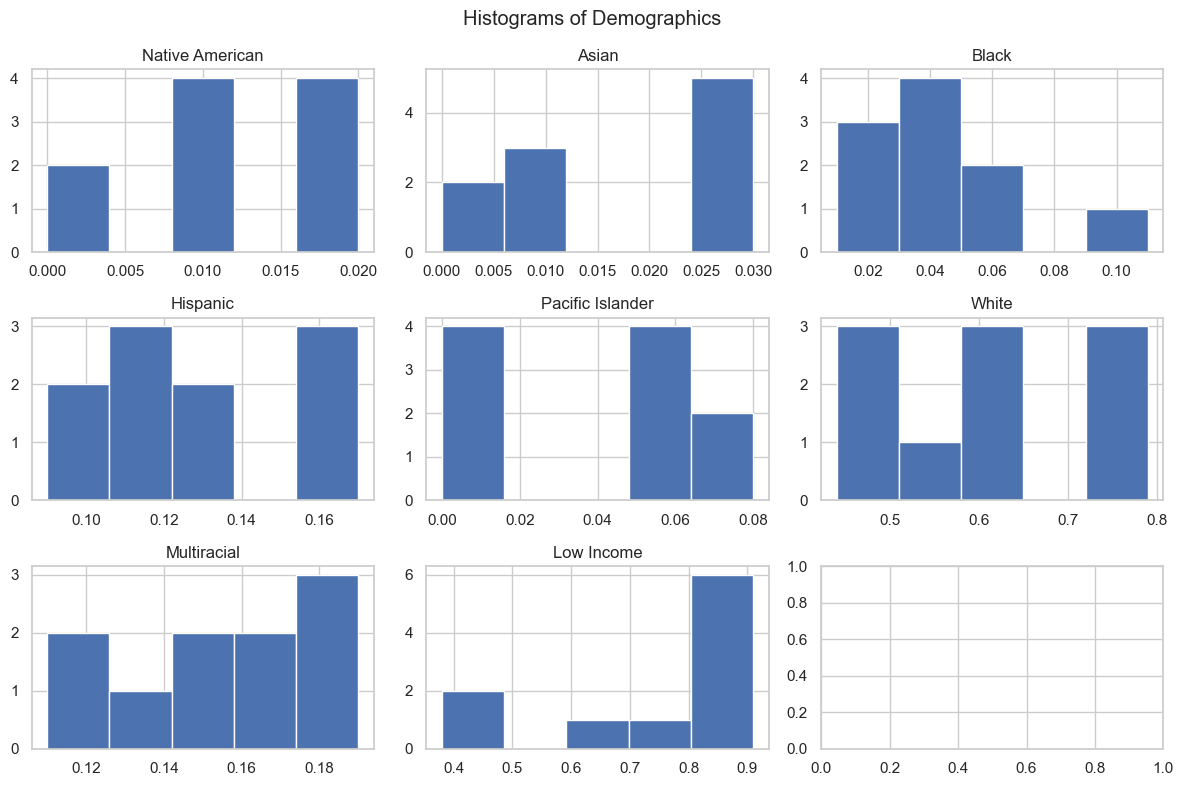

In [69]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=[12, 8])
fig.suptitle("Histograms of Demographics")

demographics["NativeAmerican"].hist(bins=5, ax=axes[0, 0])
axes[0, 0].set_title("Native American")
demographics["Asian"].hist(bins=5, ax=axes[0, 1])
axes[0, 1].set_title("Asian")
demographics["Black"].hist(bins=5, ax=axes[0, 2])
axes[0, 2].set_title("Black")
demographics["Hispanic"].hist(bins=5, ax=axes[1, 0])
axes[1, 0].set_title("Hispanic")
demographics["PacificIslander"].hist(bins=5, ax=axes[1, 1])
axes[1, 1].set_title("Pacific Islander")
demographics["White"].hist(bins=5, ax=axes[1, 2])
axes[1, 2].set_title("White")
demographics["Multiracial"].hist(bins=5, ax=axes[2, 0])
axes[2, 0].set_title("Multiracial")
demographics["LowIncome"].hist(bins=5, ax=axes[2, 1])
axes[2, 1].set_title("Low Income")

fig.tight_layout()


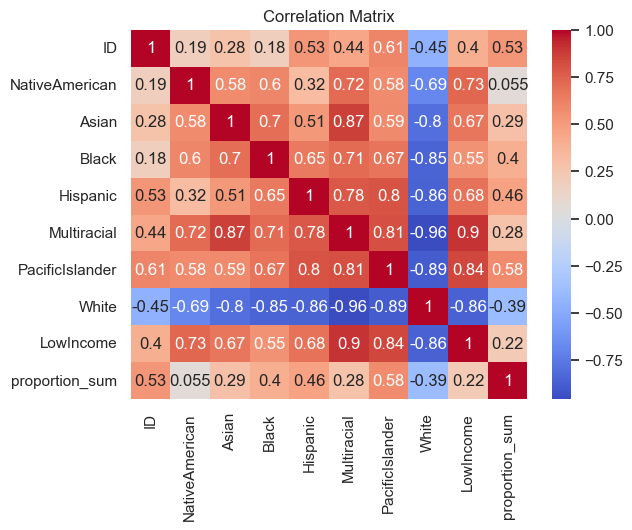

In [70]:
# correlation
demographics_corr = demographics.corr()
sns.heatmap(demographics_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

- White has a strong negative correlation with LowIncome. (-0.86)
- Pacific Islander has strong positive correlation with LowIncome. (0.84)
- Multiracial has a strong positive correlation with LowIncome. (0.90)


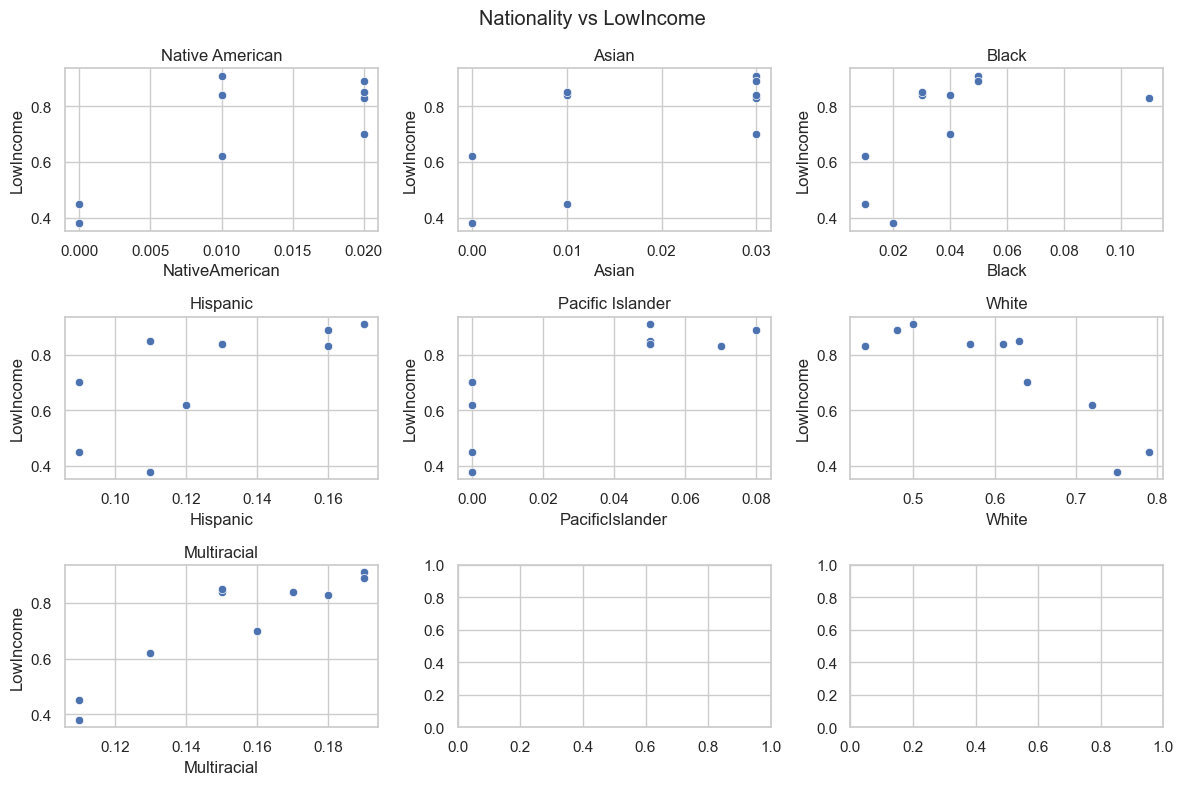

In [71]:
# Scatter plot for a specific demographic and low income
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=[12, 8])
fig.suptitle("Nationality vs LowIncome")

sns.scatterplot(data=demographics, x="NativeAmerican", y="LowIncome", ax=axes[0, 0])
axes[0, 0].set_title("Native American")
sns.scatterplot(data=demographics, x="Asian", y="LowIncome", ax=axes[0, 1])
axes[0, 1].set_title("Asian")
sns.scatterplot(data=demographics, x="Black", y="LowIncome", ax=axes[0, 2])
axes[0, 2].set_title("Black")
sns.scatterplot(data=demographics, x="Hispanic", y="LowIncome", ax=axes[1, 0])
axes[1, 0].set_title("Hispanic")
sns.scatterplot(data=demographics, x="PacificIslander", y="LowIncome", ax=axes[1, 1])
axes[1, 1].set_title("Pacific Islander")
sns.scatterplot(data=demographics, x="White", y="LowIncome", ax=axes[1, 2])
axes[1, 2].set_title("White")
sns.scatterplot(data=demographics, x="Multiracial", y="LowIncome", ax=axes[2, 0])
axes[2, 0].set_title("Multiracial")

fig.tight_layout()


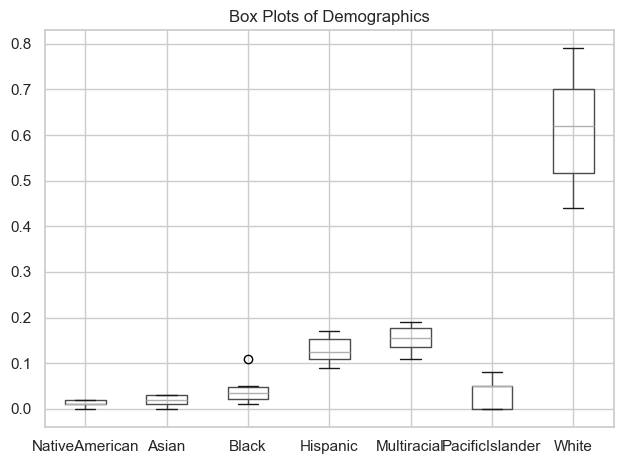

In [72]:
demographics[['NativeAmerican', 'Asian', 'Black', 'Hispanic', 'Multiracial','PacificIslander',  'White']].boxplot()
plt.title('Box Plots of Demographics')
plt.tight_layout()
plt.show()


In [76]:
demographics_nationality = demographics[demographics.columns.difference(['LowIncome', "proportion_sum"])]
demographics_income = demographics[["ID", "LowIncome"]]

<Axes: xlabel='ID'>

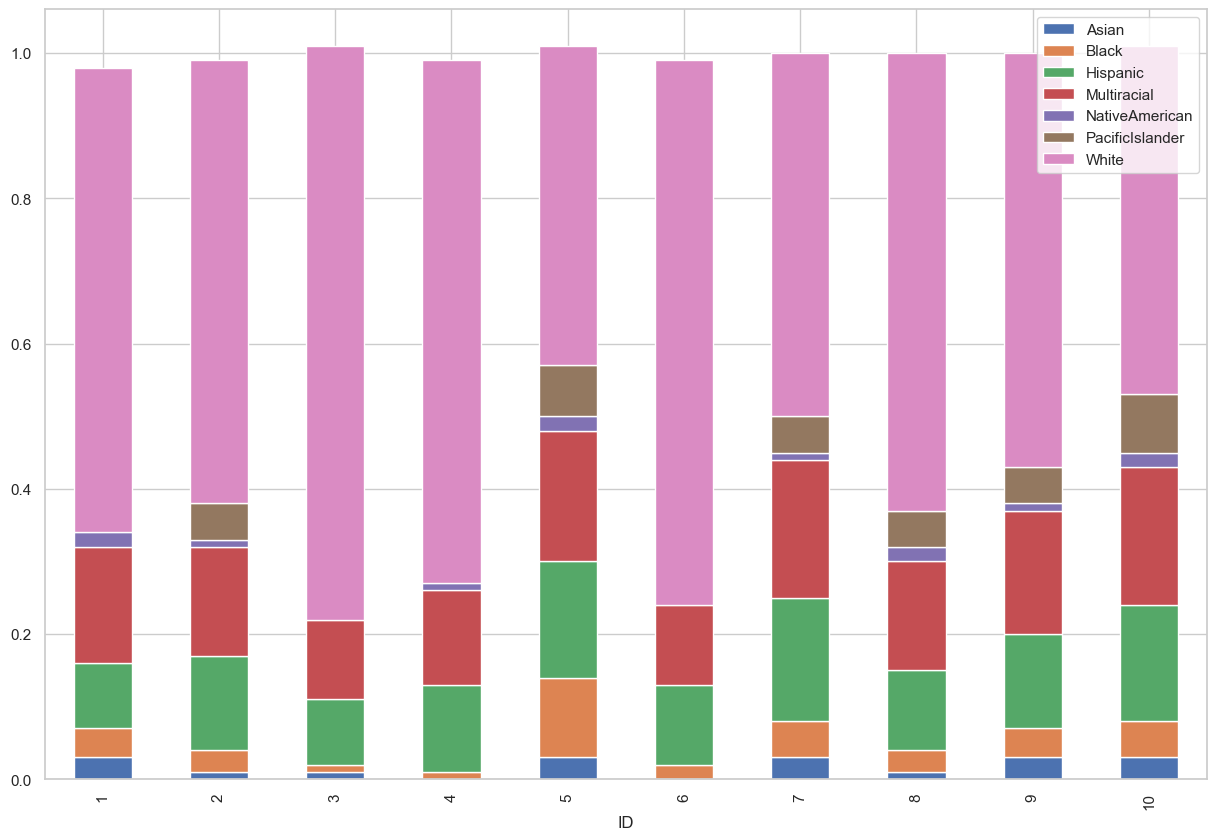

In [77]:
demographics_nationality.set_index("ID").plot(kind="bar", stacked=True, figsize=(15, 10))

<Axes: xlabel='ID', ylabel='LowIncome'>

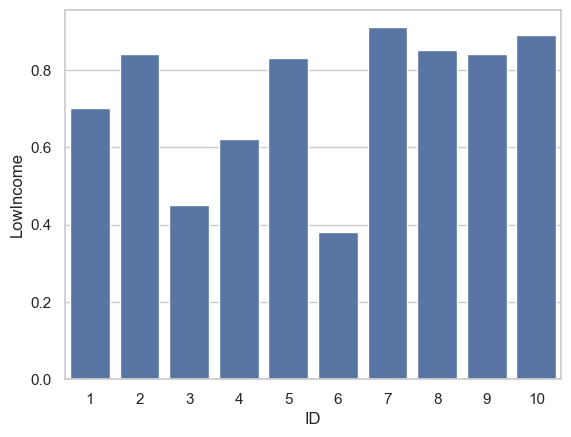

In [75]:
# demographics_income.set_index("ID").plot(kind="bar")
sns.barplot(demographics, x="ID", y="LowIncome")